In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from matplotlib import colors 
import re
import string
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [4]:
df= pd.read_csv('DataScience_jobs.csv')

In [5]:
df.drop(df.columns[[0]],axis=1,inplace=True)
df.head(10)

,roles,companies,locations,experience,skills
0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,"Chennai, Bengaluru",2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...
1,Data Scientist,Shell India Markets Private Limited,Chennai,5-7 Yrs,Data Science\nMultivariate Analysis\nFactor An...
2,Senior Data Scientist,Decision Point,Gurgaon,3-5 Yrs,Azure\ntimeseries forecasting\nMachine Learnin...
3,Data Scientist - Machine Learning & Statistica...,Talent Stock Solutions,Delhi,2-5 Yrs,Data Science\nR\nC\nData Scientist\nStatistica...
4,Data Scientist,Zen3Tech (A Tech Mahindra Company),Hyderabad,3-8 Yrs,R\nA/B Testing\nData Manipulation\nMachine Lea...
5,Data Scientist,Extentia Information Technology Pvt Ltd,Pune,0-2 Yrs,Machine Learning\nPython
6,Data Scientist,KONE Elevator India Pvt. Ltd,Pune,3-5 Yrs,predictive algorithms\nK-Means\nGithub\nGenera...
7,Data Scientist | Integreon Managed Solutions |...,INTEGREON MANAGED SOLUTIONS INDIA PVT LIMITED,Mumbai,2-7 Yrs,analytics\npython\ntableau\nregression\npredic...
8,Data Scientist,Bigshyft Hiring for Indus OS,Mumbai,2-5 Yrs,cassandra\nScala\nHadoop\nSpark\nPython
9,Senior Data Scientist (NLP),Visible Alpha Solutions India Pvt. Ltd.,Mumbai,5-7 Yrs,Java\nR\nNLP\nAlgorithms\nLinux\nWeb Technolog...


In [6]:
df = df.dropna()

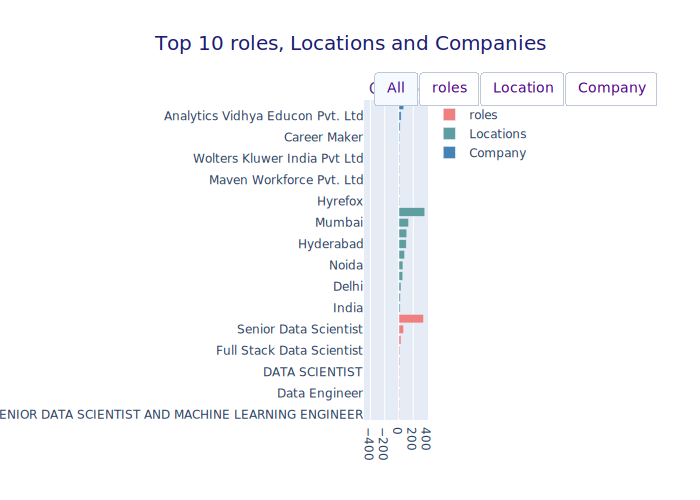

In [7]:
dfp = df['roles'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['locations'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = df['companies'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['roles'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'roles',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = dfl['locations'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Locations',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['companies'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="roles", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Company', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 roles, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))
fig.show(renderer='svg')

In [14]:
dfp = df['roles'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['locations'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = df['companies'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['roles'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'roles',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = dfl['locations'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Locations',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['companies'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="roles", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Company', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 roles, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))
fig.show(renderer='kaggle')

In [13]:
dfp = df['roles'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['locations'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = df['companies'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['roles'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'roles',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = dfl['locations'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Locations',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['companies'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="roles", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Company', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 roles, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))
fig.show(renderer='nteract')

In [11]:
dfp = df['roles'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['locations'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = df['companies'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['roles'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'roles',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = dfl['locations'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Locations',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['companies'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="roles", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Company', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 roles, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))
fig.show(renderer='browser')

In [15]:
dfp = df['roles'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['locations'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = df['companies'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['roles'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'roles',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = dfl['locations'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Locations',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['companies'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="roles", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Company', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 roles, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))
fig.show(renderer='json')

In [16]:
dfp = df['roles'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['locations'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = df['companies'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['roles'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'roles',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = dfl['locations'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Locations',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['companies'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="roles", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Company', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 roles, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))
fig.show(renderer='sphinx_gallery')

In [17]:

dfp = df['roles'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['locations'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = df['companies'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['roles'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'roles',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = dfl['locations'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Locations',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['companies'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="roles", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Company', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 roles, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))
fig.show(renderer='iframe')